# Polynomial Regression: Film Revenue Voorspellen

## 1. Introductie
In dit notebook gaan we een Polynomial Regression model maken om de revenue van films te voorspellen. Dit is een uitbreiding op het Linear Regression model, waarbij we polynomiale features gebruiken om non-lineaire relaties te kunnen modelleren.

### Doelen
- Laad de clean dataset
- Feature engineering met PolynomialFeatures
- Trainen en evalueren van het model
- Vergelijken met Linear Regression resultaten

In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## 2. Laad Data
We gebruiken de `movies_cleaned.csv` dataset.

In [65]:
DATA_PATH = os.path.join("output", "movies_cleaned.csv")

if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print(f"Successfully loaded data from {DATA_PATH}")
    print(f"Dataset shape: {df.shape}")
else:
    print(f"Error: File not found at {DATA_PATH}")

df.head()

Successfully loaded data from output\movies_cleaned.csv
Dataset shape: (333686, 15)


,id,original_language,origin_country,release_date,genre_names,production_company_names,budget,revenue,runtime,vote_average,vote_count,weighted_vote,genre_numeric,country_hash,original_language_numeric
0,183599,en,['GB'],1900-01-01,"['Crime', 'Thriller', 'Comedy']",['Robert W. Paul'],3202.457428,2048.373283,2,4.0,3,3.162890,65560,-2496249541690252953,35
1,183568,en,"['GB', 'US']",1900-01-01,['History'],['Robert W. Paul'],4626.630247,3526.674811,2,4.0,1,2.744336,512,-4183168635112124214,35
2,811141,en,['GB'],1900-01-01,[],[],3939.446826,2991.112535,2,4.0,1,2.744336,0,-2496249541690252953,35
3,119974,fr,['FR'],1900-01-01,"['Science Fiction', 'Horror', 'Comedy']",['Gaumont'],1455.925201,924.420105,2,4.9,22,4.591094,17416,3627348244984653200,45
4,188399,en,['GB'],1900-01-01,['Documentary'],['Mitchell & Kenyon'],4630.663425,4478.154016,3,5.0,3,3.662890,32,-2496249541690252953,35


## 3. Feature Selectie
We gebruiken dezelfde numerieke features als bij Linear Regression om een eerlijke vergelijking te maken.

In [66]:
TARGET = 'revenue'
features_to_use = ['budget', 'runtime', 'vote_average', 'vote_count', 'genre_numeric', 'country_hash', 'weighted_vote', 'original_language_numeric']

# Data preparation
data_clean = df[features_to_use + [TARGET]].dropna()

X = data_clean[features_to_use]
y = data_clean[TARGET]

print(f"Features shape: {X.shape}")

Features shape: (333686, 8)


## 4. Polynomial Regression Training
We transformeren onze features naar een hogere graad (bijvoorbeeld graad 2 of 3) en trainen dan een Linear Regression model op deze nieuwe features.

In [67]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Original features count: {X_train.shape[1]}")
print(f"Polynomial features count: {X_train_poly.shape[1]}")

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

print("Model training completed.")

Original features count: 8
Polynomial features count: 44
Model training completed.


## 5. Evaluatie
We berekenen de RMSE en R2 score voor het Polynomial Regression model.

In [68]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression (Degree 2) Results:")
print(f"RMSE: {rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

Polynomial Regression (Degree 2) Results:
RMSE: 15,667,625.15
R2 Score: 0.7705


## 6. Visualisatie
We visualiseren de voorspellingen ten opzichte van de werkelijke waarden.

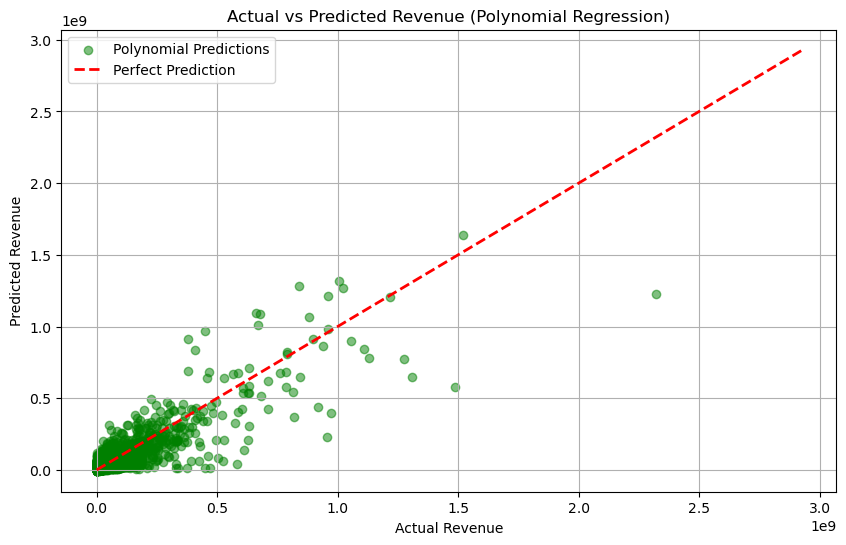

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Polynomial Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

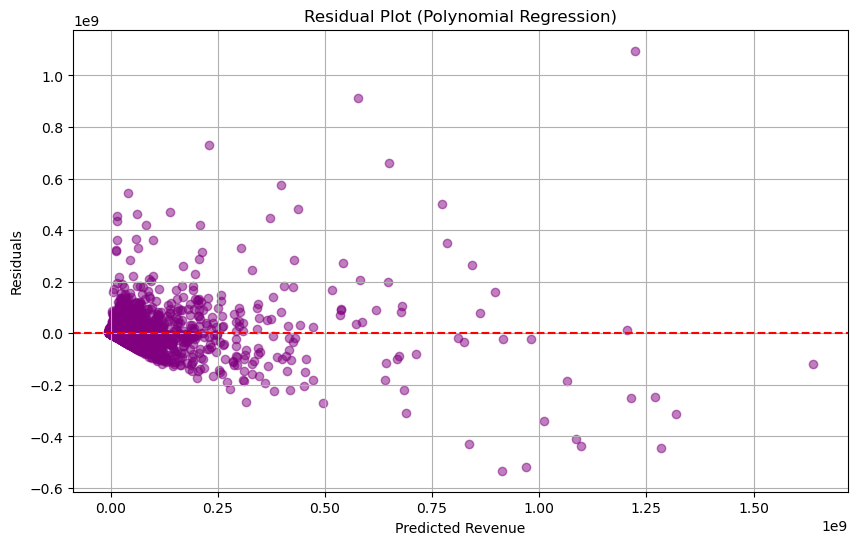

In [70]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot (Polynomial Regression)')
plt.grid(True)
plt.show()

## 7. conclusie

De data is niet erg geschikt voor een polynomele regressie, en kan beter met een lineaire regressie gedaan worden.